In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [6]:
import fastai.vision as fvis

data_folder = 'data-preprocessed'

data = fvis.ImageDataBunch.from_folder(data_folder,
                                       train='.',
                                       valid_pct=0.2,
                                       size=144,
                                       num_workers=4)

data = data.normalize(fvis.imagenet_stats)

data

ImageDataBunch;

Train: LabelList (1152 items)
x: ImageList
Image (3, 144, 144),Image (3, 144, 144),Image (3, 144, 144),Image (3, 144, 144),Image (3, 144, 144)
y: CategoryList
happy,happy,happy,happy,happy
Path: data-preprocessed;

Valid: LabelList (288 items)
x: ImageList
Image (3, 144, 144),Image (3, 144, 144),Image (3, 144, 144),Image (3, 144, 144),Image (3, 144, 144)
y: CategoryList
calm,angry,disgust,angry,happy
Path: data-preprocessed;

Test: None

In [4]:
data.classes

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

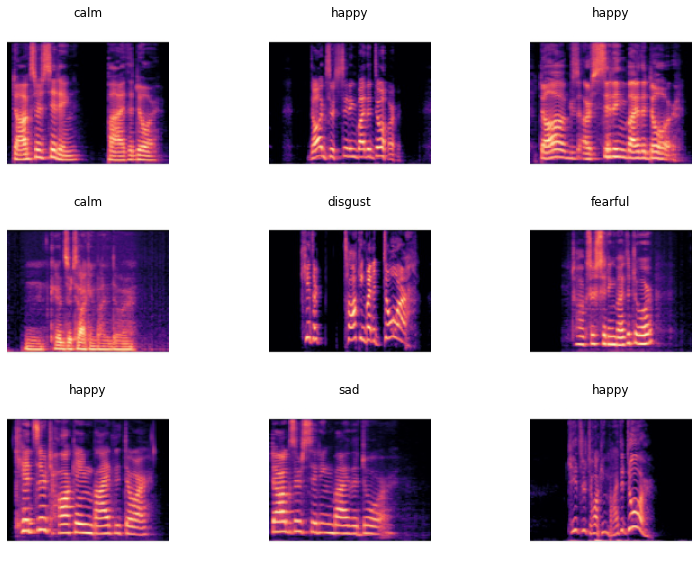

In [5]:
data.show_batch(rows=3, figsize=(12, 8))

In [6]:
learner = fvis.cnn_learner(data, fvis.models.resnet34, metrics=fvis.accuracy)

In [7]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.163707,2.153344,0.298611,02:34
1,2.732678,2.218675,0.371528,02:19
2,2.429980,1.955482,0.416667,02:13
3,2.228245,1.830697,0.402778,02:16
4,2.112007,1.805431,0.402778,02:14


In [8]:
learner.unfreeze()

In [9]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


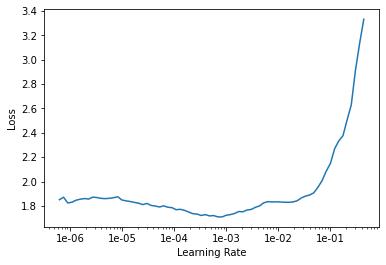

In [10]:
learner.recorder.plot()

In [11]:
learner.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.811081,1.728998,0.416667,03:08
1,1.695477,1.676948,0.444444,03:07
2,1.623662,1.619315,0.482639,03:08
3,1.517683,1.584602,0.496528,03:08
4,1.446611,1.580950,0.500000,03:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


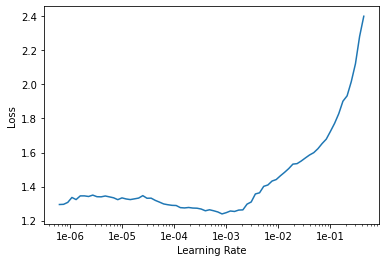

In [12]:
learner.lr_find()
learner.recorder.plot()

In [13]:
learner.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.300799,1.517429,0.500000,03:07
1,1.246185,1.512239,0.524306,03:14
2,1.233998,1.456069,0.555556,03:10
3,1.182653,1.407614,0.572917,03:13
4,1.143911,1.399937,0.572917,03:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


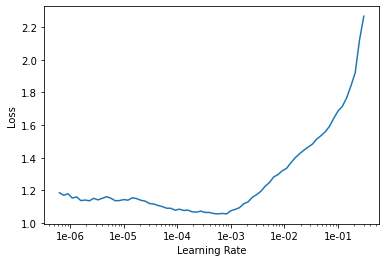

In [14]:
learner.lr_find()
learner.recorder.plot()